In [10]:
#Importar las librerías correspondientes
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
#lectura del archivo
df = pd.read_csv("fifa_eda.csv")

df.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500.0,565.0,Left,5.0,4.0,RF,2004,2021-01-01,5.583333,159.0,226500.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000.0,405.0,Right,5.0,5.0,ST,2018,2022-01-01,6.166667,183.0,127100.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500.0,290.0,Right,5.0,5.0,LW,2017,2022-01-01,5.750000,150.0,228100.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000.0,260.0,Right,4.0,1.0,GK,2011,2020-01-01,6.333333,168.0,138600.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000.0,355.0,Right,4.0,4.0,RCM,2015,2023-01-01,5.916667,154.0,196400.0


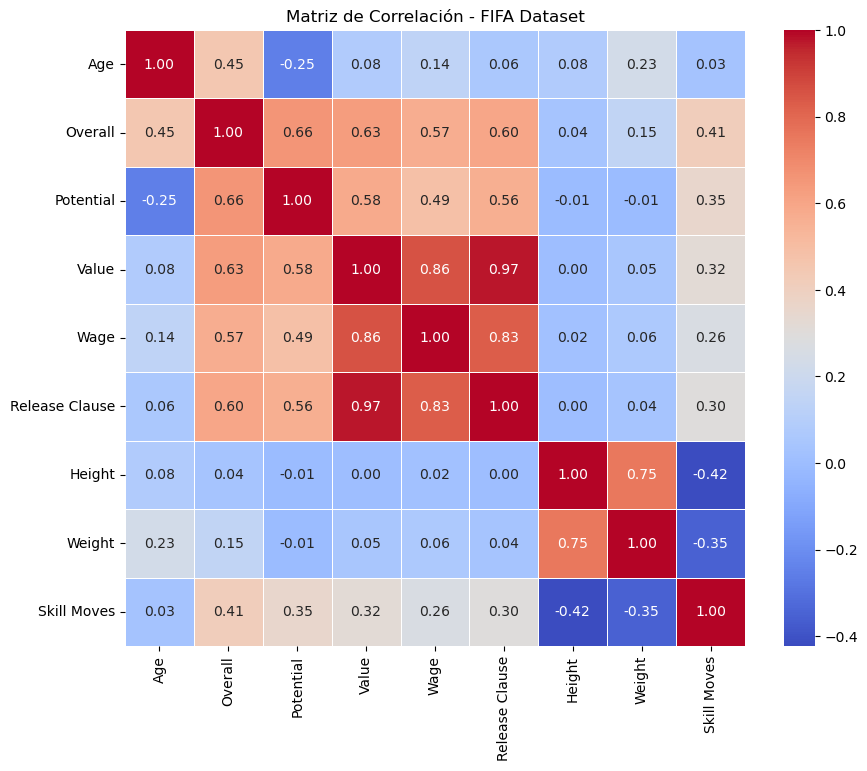

In [13]:
# Matriz de correlación (Heatmap): seleccionar variables numéricas relevantes
numeric_cols = ['Age','Overall','Potential','Value','Wage','Release Clause','Height','Weight','Skill Moves']

correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación - FIFA Dataset')
plt.show()

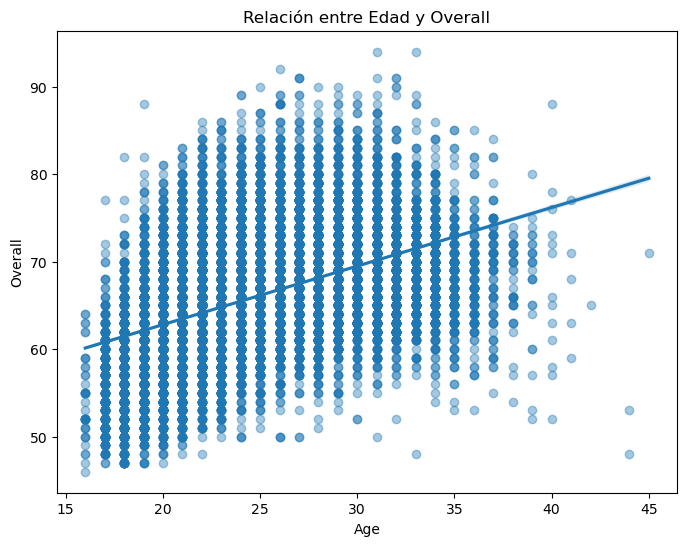

Correlación Edad vs Overall: 0.4523495214563286


In [15]:
#Relación entre Edad y Overall
plt.figure(figsize=(8,6))
sns.regplot(data=df, x='Age', y='Overall', scatter_kws={'alpha':0.4})
plt.title('Relación entre Edad y Overall')
plt.show()

# Calcular correlación numérica
correlacion_age_overall = df['Age'].corr(df['Overall'])
print("Correlación Edad vs Overall:", correlacion_age_overall)

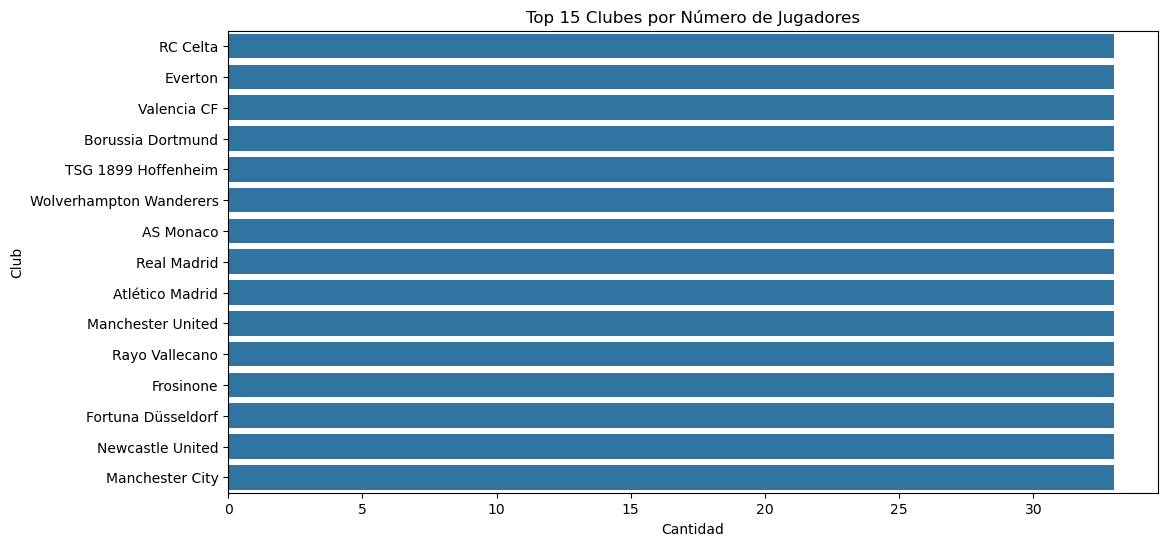

In [16]:
#Número de jugadores por club
club_counts = df['Club'].value_counts().head(15)

plt.figure(figsize=(12,6))
sns.barplot(x=club_counts.values, y=club_counts.index)
plt.title('Top 15 Clubes por Número de Jugadores')
plt.xlabel('Cantidad')
plt.ylabel('Club')
plt.show()

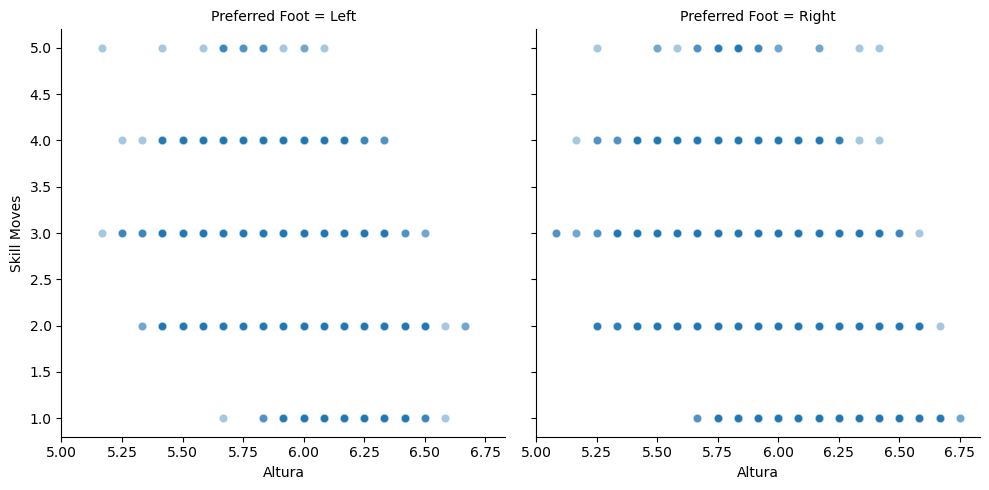

In [17]:
#Multi-panel: Altura vs Skill Moves
g = sns.FacetGrid(df, col="Preferred Foot", height=5)
g.map_dataframe(sns.scatterplot, x="Height", y="Skill Moves", alpha=0.4)
g.set_axis_labels("Altura", "Skill Moves")
plt.show()

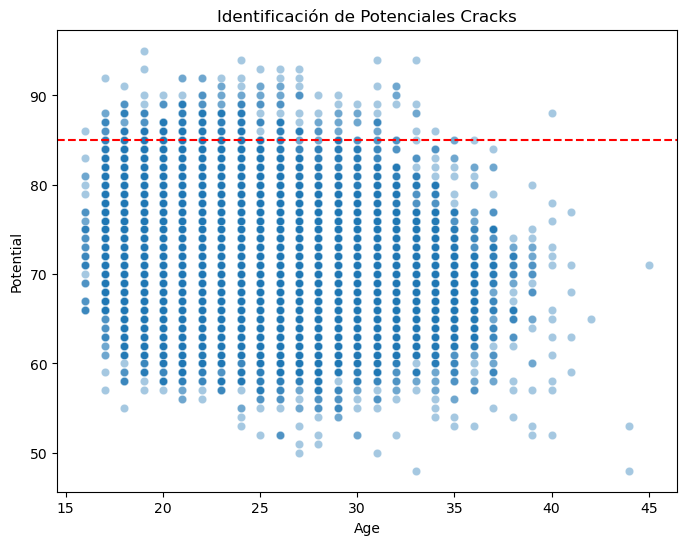

In [18]:
#Gráfico para identificar potenciales cracks
plt.figure(figsize=(8,6))

sns.scatterplot(data=df, x='Age', y='Potential', alpha=0.4)

plt.axhline(85, color='red', linestyle='--')

plt.title('Identificación de Potenciales Cracks')
plt.show()